## Sentiment Analysis of Tweets or Reviews

Type: NLP + Classification

Goal: Classify sentiments as Positive, Negative, or Neutral

Techniques: Text vectorization (TF-IDF), Naive Bayes, RNN (optional)

1. Importing libraries and loading the dataset

In [18]:
import pandas as pd, re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load a subset (e.g., 200k rows for speed)
df = pd.read_csv('training.1600000.processed.noemoticon.csv',
                 encoding='latin-1',
                 names=['sentiment','id','date','flag','user','text'])
df = df[['sentiment','text']].sample(200000, random_state=42)
df['sentiment'] = df['sentiment'].map({0:0, 4:1})  # binary

def clean(text):
    text = re.sub(r"http\S+|@\w+|#","", text.lower())
    text = re.sub(r"[^a-z\s]", "", text)
    return text

df['clean'] = df['text'].apply(clean)

X_train, X_test, y_train, y_test = train_test_split(
    df['clean'], df['sentiment'], test_size=0.2, random_state=42)

tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)


MultinomialNB()

2. Evaluation

              precision    recall  f1-score   support

           0       0.78      0.78      0.78     20088
           1       0.78      0.78      0.78     19912

    accuracy                           0.78     40000
   macro avg       0.78      0.78      0.78     40000
weighted avg       0.78      0.78      0.78     40000



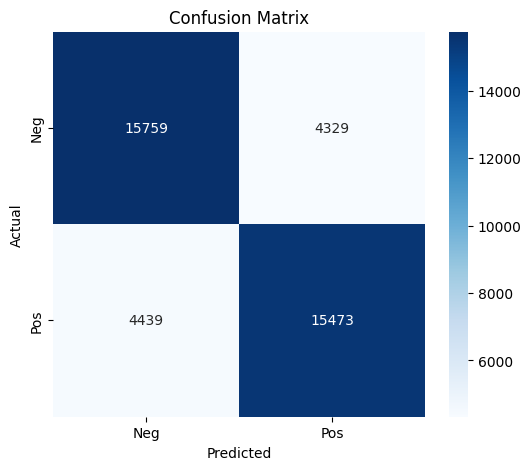

In [19]:
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Neg","Pos"], yticklabels=["Neg","Pos"])
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')
plt.show()


3. Visualization


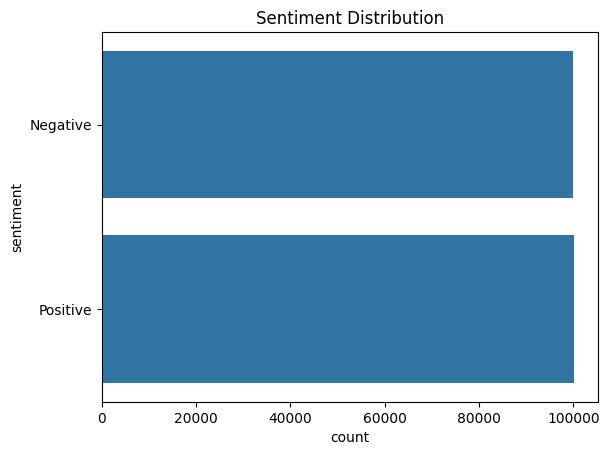

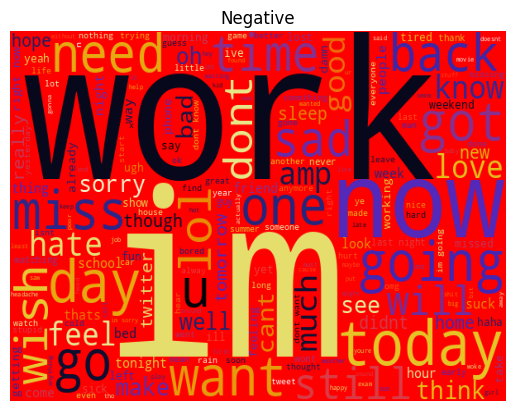

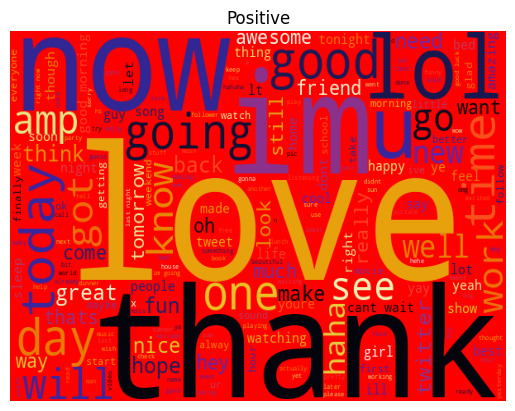

In [20]:
import seaborn as sns
from wordcloud import WordCloud

# Distribution
sns.countplot(df['sentiment'].map({0:'Negative',1:'Positive'}))
plt.title('Sentiment Distribution'); plt.show()

# Word clouds
for label, col in [(0,'CMRmap'), (1,'CMRmap')]:
    words = ' '.join(df[df['sentiment']==label]['clean'])
    wc = WordCloud(width=600, height=400, background_color='red', colormap=col)
    plt.imshow(wc.generate(words), aspect='auto')
    plt.axis('off')
    plt.title('Negative' if label==0 else 'Positive')
    plt.show()


Using RNN (keras LSTM Model)

In [23]:
import pandas as pd, re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin-1',
                 names=['sentiment','id','date','flag','user','text'])
df = df[['sentiment','text']].sample(100000, random_state=42)
df['sentiment'] = df['sentiment'].map({0:0, 4:1})  # binary

def clean(text):
    text = re.sub(r"http\S+|@\w+|#","", text.lower())
    text = re.sub(r"[^a-z\s]", "", text)
    return text

df['clean'] = df['text'].apply(clean)

# Tokenize
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['clean'])

X = tokenizer.texts_to_sequences(df['clean'])
X = pad_sequences(X, maxlen=max_len)
y = df['sentiment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

# Evaluate
y_pred = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 109s 200ms/step - accuracy: 0.6823 - loss: 0.5780 - val_accuracy: 0.7839 - val_loss: 0.4607
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 90s 179ms/step - accuracy: 0.8084 - loss: 0.4194 - val_accuracy: 0.7877 - val_loss: 0.4591
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 86s 171ms/step - accuracy: 0.8347 - loss: 0.3723 - val_accuracy: 0.7847 - val_loss: 0.4676
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 85s 170ms/step - accuracy: 0.8559 - loss: 0.3242 - val_accuracy: 0.7757 - val_loss: 0.5132
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 86s 171ms/step - accuracy: 0.8763 - loss: 0.2836 - val_accuracy: 0.7744 - val_loss: 0.5878
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 88s 175ms/step - accuracy: 0.8878 - loss: 0.2541 - val_accuracy: 0.7660 - val_loss: 0.6572
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 86s 173ms/step - accuracy: 0.9017 - loss: 0.2233 - val_accuracy: 0.7548 - val_loss: 0.7208
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 87s 174ms/step - accuracy: 0.9131 - loss: 

In [25]:
import pickle
pickle.dump(tokenizer, open('tokenizer1.pkl', 'wb'))


In [26]:
# The key part: saving the model
model.save('sentiment_lstm1.h5')


In [27]:
import pandas as pd
print(df['sentiment'].value_counts())


sentiment
1    50057
0    49943
Name: count, dtype: int64


In [30]:
import numpy as np

y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)


625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step


In [31]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred_classes))
print(classification_report(y_test, y_pred_classes))


[[ 9995     0]
 [10005     0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      9995
           1       0.00      0.00      0.00     10005

    accuracy                           0.50     20000
   macro avg       0.25      0.50      0.33     20000
weighted avg       0.25      0.50      0.33     20000



c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [32]:
label_map = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
sentiments = [label_map[c] for c in y_pred_classes]


In [33]:
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

print(confusion_matrix(y_test, y_pred_classes))
print(classification_report(y_test, y_pred_classes))

label_map = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
sentiments = [label_map[c] for c in y_pred_classes]
print(sentiments[:10])  # print first 10 predicted sentiments


625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step
[[ 9995     0]
 [10005     0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      9995
           1       0.00      0.00      0.00     10005

    accuracy                           0.50     20000
   macro avg       0.25      0.50      0.33     20000
weighted avg       0.25      0.50      0.33     20000

['Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative']


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [34]:
import secrets
secrets.token_hex(16)


'ccfe3aa0356e63f94f913df6f2b0b284'